In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
d = 1e-6
theta_Cd = np.array([27.842, 28.792, 30.658, 40.083])  #fokba váltottam a jobb és bal oldali átlagát
#legnagyobb hiba 2.5' = 0.042 fok
l_m_Cd = d * np.sin(theta_Cd * np.pi / 180) * 1e9   #mért hullámhossz
l_i_Cd = np.array([467.82, 479.99, 508.58, 643.85])  #irodalmi hullámhossz
#http://metal.elte.hu/oktatas/alkfizlab/meresleirasok/Afuggelek.pdf

In [3]:
print(l_m_Cd)

[467.0349467  481.63131391 509.91247616 643.89664466]


In [4]:
delta = l_m_Cd - l_i_Cd
print(delta)

[-0.7850533   1.64131391  1.33247616  0.04664466]


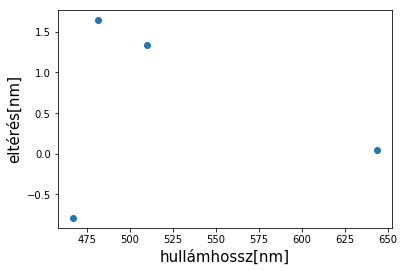

In [5]:
plt.plot(l_m_Cd, delta, marker = 'o', linestyle = '')
plt.xlabel('hullámhossz[nm]', fontsize = 15)
plt.ylabel('eltérés[nm]', fontsize = 15)
plt.savefig('elteres.eps')

In [6]:
l = np.linspace(l_m_Cd[0], l_m_Cd[3], 1e4)
ip = interp1d(l_m_Cd, delta)

/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


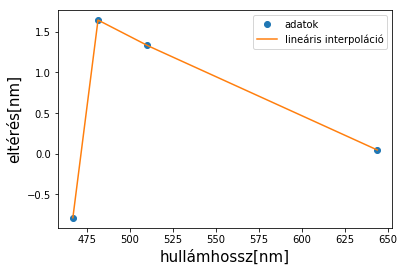

In [7]:
plt.plot(l_m_Cd, delta, marker = 'o', linestyle = '', label = 'adatok')
plt.plot(l, ip(l), label = 'lineáris interpoláció')
plt.xlabel('hullámhossz[nm]', fontsize = 15)
plt.ylabel('eltérés[nm]', fontsize = 15)
plt.legend()
plt.savefig('elteres_ip.eps')

In [8]:
theta_HD = np.array([23.458, 24.333, 32.333, 33.1, 38.067, 41.067])
l_m_HD = d * np.sin(theta_HD * np.pi / 180) * 1e9 #H-D-lámpa hullámhosszai nm-ben

In [9]:
print(l_m_HD)

[398.07672171 412.03922092 534.8390966  546.10196101 616.58253079
 656.94111543]


In [10]:
l_HD = [] #hullámhosszak, amik korrigálhatók
for i in range(len(l_m_HD)):
    if l_m_HD[i] > l_m_Cd[0] and l_m_HD[i] < l_m_Cd[3]:
        l_HD.append(l_m_HD[i])
l_HD = np.array(l_HD)

In [11]:
print(l_HD)

[534.8390966  546.10196101 616.58253079]


In [12]:
l_korr_HD = l_HD + ip(l_HD) #korrigált hullámhosszak
print(l_korr_HD)

[535.9323547  547.08713063 616.89130603]


In [13]:
def Rydberg(lam, m):
    return 1/(lam * (1/4 - 1/(m**2)))

In [14]:
R1 = Rydberg(l_m_HD[5] * 1e-9, 3)
print(R1)

10959886.40522928


In [15]:
R2 = Rydberg(l_m_HD[0] * 1e-9, 7)
print(R2)

10941497.75166968


In [16]:
R3 = Rydberg(l_m_HD[1] * 1e-9, 6)
print(R3)

10921290.429356622


In [17]:
Rm = (R1 + R2 + R3)/3
Rm

10940891.52875186

In [18]:
deltaR = [abs(R1-Rm), abs(R2-Rm), abs(R3-Rm)] #átlagtól való eltéréss
print(max(deltaR))

19601.099395237863


In [19]:
R1/(l_m_HD[5] * 1e-9) * 1.329 * 1e-9 #deriválással számolt hibák

22171.985723699836

In [20]:
R2/(l_m_HD[0] * 1e-9) * 1.329 * 1e-9

36528.76372572883

In [21]:
R3/(l_m_HD[1] * 1e-9) * 1.329 * 1e-9

35225.76066437597

In [22]:
d * np.cos(23.458 * np.pi / 180) * (0.083 * np.pi / 180) * 1e9 #hulámhosszak hibái

1.3288976453466395

In [23]:
d * np.cos(24.333 * np.pi / 180) * (0.083 * np.pi / 180) * 1e9

1.3199364384473637

In [24]:
d * np.cos(41.067 * np.pi / 180) * (0.083 * np.pi / 180) * 1e9

1.092177770453185